# **Importing Libraries**




1.   Prophet
2.   numpy
3.   pandas
4.   seaborn
5.   matplotlib.pyplot
6.   sklearn.metrics
7.   sklearn.preprocessing

In [19]:
from prophet import Prophet

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# **Importing Dataset from Google Drive**

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df=pd.read_csv("/content/drive/MyDrive/crimedataset/crime_rates.csv", on_bad_lines='skip')

In [25]:
print("Initial Shape:", df.shape)
df.head()

Initial Shape: (1456714, 23)


,Unnamed: 0,ID,Case Number,Date,place,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [26]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'place', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [27]:
df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,329460
BATTERY,263700
CRIMINAL DAMAGE,155455
NARCOTICS,135240
ASSAULT,91289
OTHER OFFENSE,87874
BURGLARY,83397
DECEPTIVE PRACTICE,75495
MOTOR VEHICLE THEFT,61138


In [28]:
df['Primary Type'].unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'KIDNAPPING', 'HOMICIDE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'PROSTITUTION', 'GAMBLING', 'INTIMIDATION', 'ARSON',
       'LIQUOR LAW VIOLATION', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

# **Data Cleaning**



1.   Dropping rows without dates
2.   Filtering
3.   Checking if 'Primary Type' has no null



In [29]:
# df.dropna(inplace=True)
df.dropna(subset=['Date'], inplace=True)  # drop rows without dates
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= '2010-01-01']  # filter recent data
df = df[df['Primary Type'].notna()]  # ensure crime type exists

In [30]:
df.drop(columns=['Unnamed: 0', 'Case Number', 'place', 'IUCR', 'Description',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude',
       'Longitude', 'Location'])

,ID,Date,Primary Type,Location Description,Arrest,Year
0,10508693,2016-05-03 23:40:00,BATTERY,APARTMENT,True,2016
1,10508695,2016-05-03 21:40:00,BATTERY,RESIDENCE,False,2016
2,10508697,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,STREET,False,2016
3,10508698,2016-05-03 22:10:00,BATTERY,SIDEWALK,False,2016
4,10508699,2016-05-03 22:00:00,THEFT,RESIDENCE,False,2016
...,...,...,...,...,...,...
1456709,10508679,2016-05-03 23:33:00,BATTERY,APARTMENT,True,2016
1456710,10508680,2016-05-03 23:30:00,CRIMINAL DAMAGE,APARTMENT,True,2016
1456711,10508681,2016-05-03 00:15:00,BATTERY,SIDEWALK,False,2016
1456712,10508690,2016-05-03 21:07:00,BATTERY,SIDEWALK,False,2016


# **Binning by Month & Crime Count**

In [32]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_crime = df.groupby('Month').size().reset_index(name='CrimeCount')
monthly_crime['Month'] = monthly_crime['Month'].dt.to_timestamp()

# Rename for Prophet compatibility
monthly_crime = monthly_crime.rename(columns={"Month": "ds", "CrimeCount": "y"})

# ***Data Visualization***

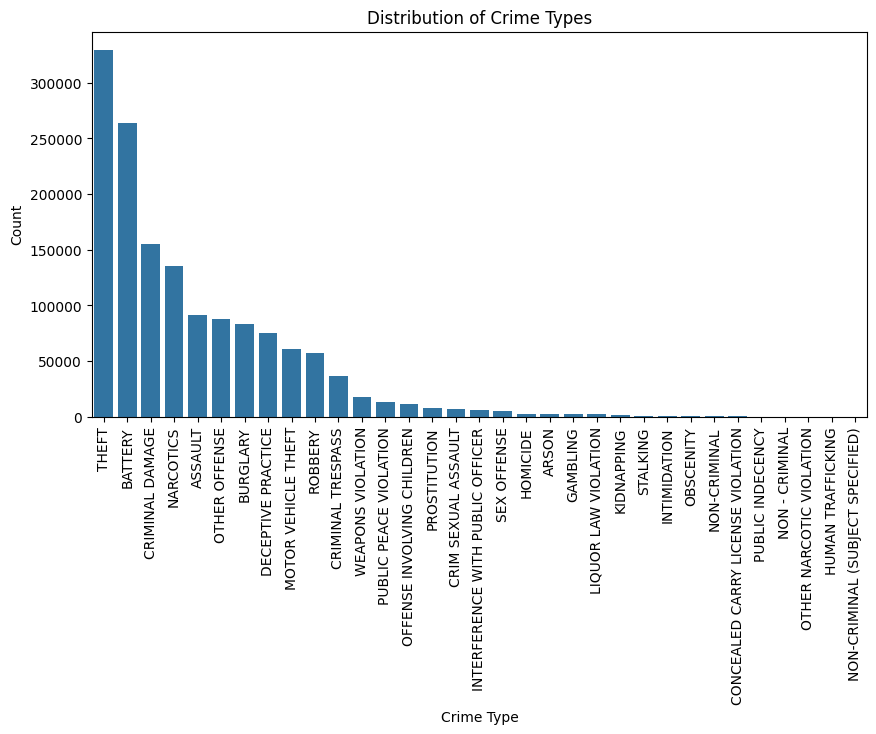

In [33]:
# graph for crime type
plt.figure(figsize=(10, 5))
sns.countplot(x='Primary Type', data=df, order=df['Primary Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()

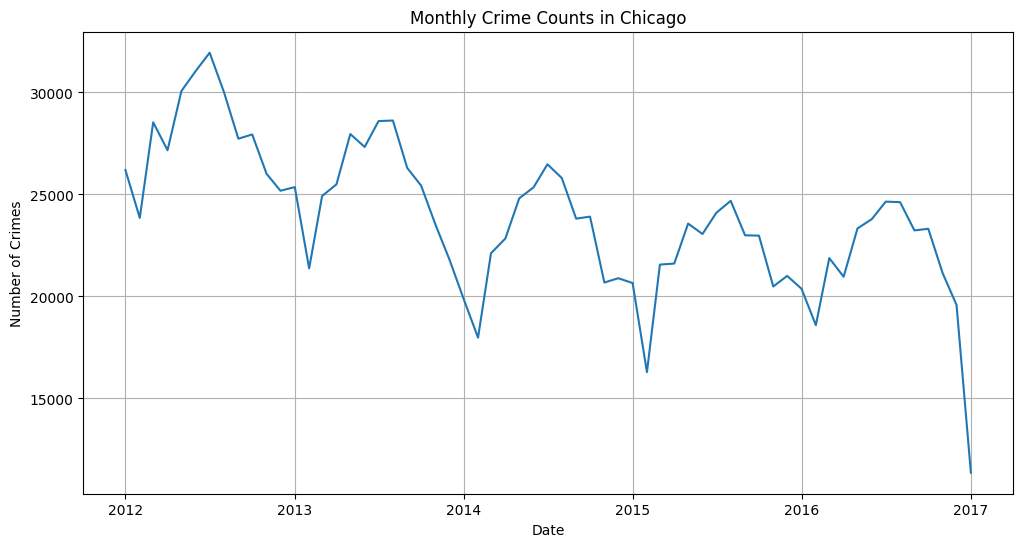

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_crime['ds'], monthly_crime['y'])
plt.title('Monthly Crime Counts in Chicago')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

# **Using Prophet**

Main feature of Prophet is :
---
Robust to outliers, missing data, and dramatic changes in your time series



> Trying 3 different models:

    Model 1 - plain (without removing outliers).
    Model 2 - removing outliers.
    Model 3 - including holidays.


Model 1 - plain (without removing outliers)

In [35]:
m1 = Prophet()
m1.fit(monthly_crime)
future1 = m1.make_future_dataframe(periods=12, freq='M')
forecast1 = m1.predict(future1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf9q7kx6_/ojq_agaf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf9q7kx6_/fvc_eejj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30991', 'data', 'file=/tmp/tmpf9q7kx6_/ojq_agaf.json', 'init=/tmp/tmpf9q7kx6_/fvc_eejj.json', 'output', 'file=/tmp/tmpf9q7kx6_/prophet_modelxv75iv1y/prophet_model-20250424132813.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:28:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


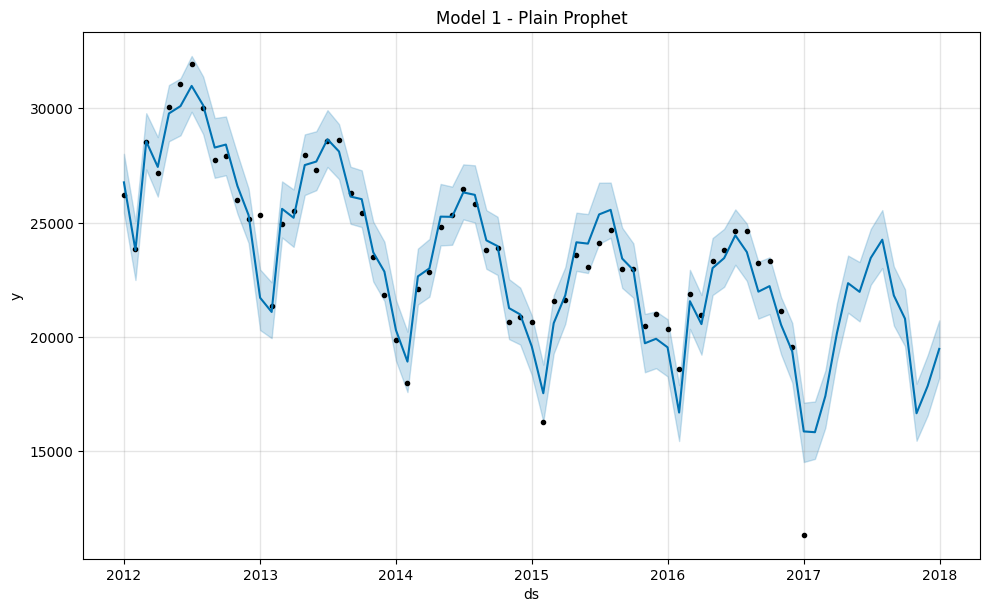

In [36]:
m1.plot(forecast1)
plt.title("Model 1 - Plain Prophet")
plt.show()

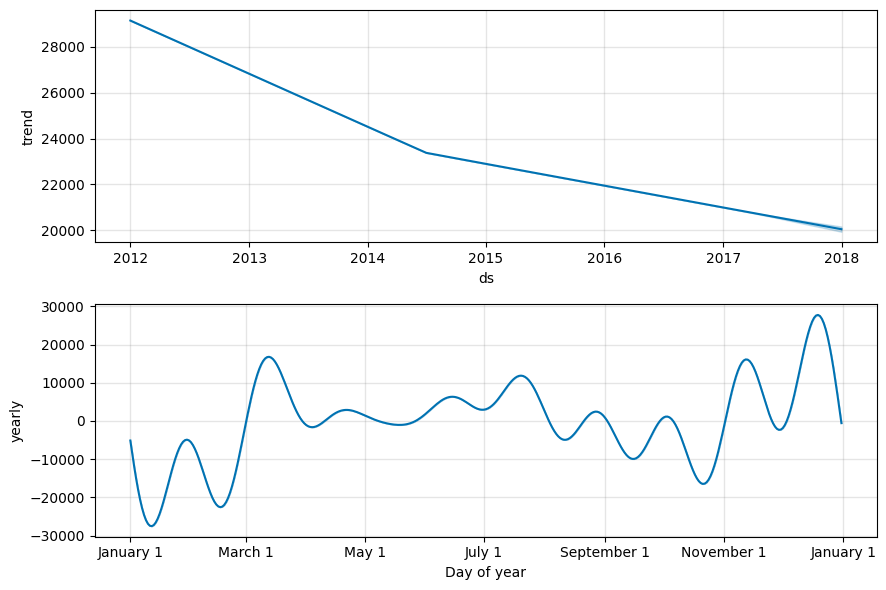

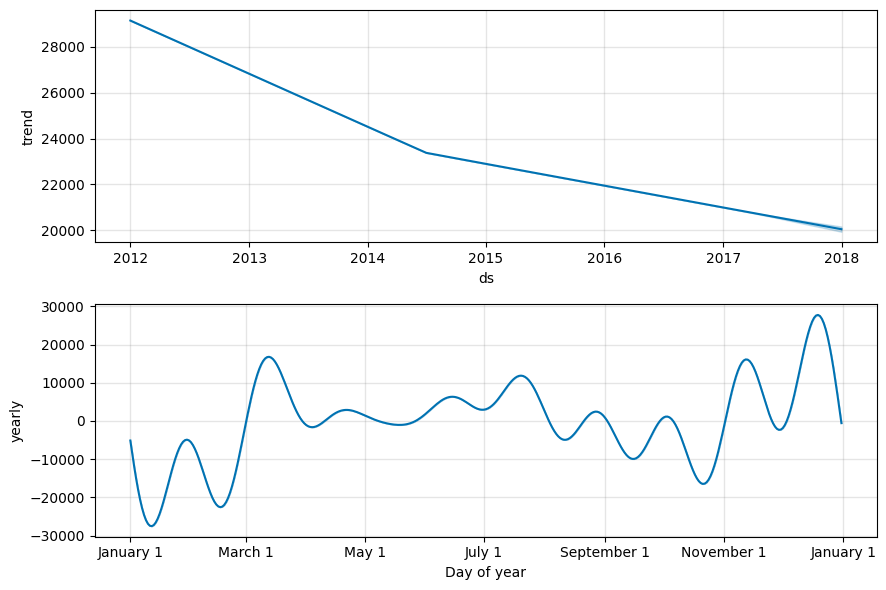

In [37]:
m1.plot_components(forecast1)

Model 2 - removing outliers

In [38]:
mean = monthly_crime['y'].mean()
std = monthly_crime['y'].std()
no_outliers = monthly_crime[np.abs(monthly_crime['y'] - mean) <= (3 * std)]

m2 = Prophet()
m2.fit(no_outliers)
future2 = m2.make_future_dataframe(periods=12, freq='M')
forecast2 = m2.predict(future2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf9q7kx6_/ux06o11c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf9q7kx6_/e2klk8hw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40374', 'data', 'file=/tmp/tmpf9q7kx6_/ux06o11c.json', 'init=/tmp/tmpf9q7kx6_/e2klk8hw.json', 'output', 'file=/tmp/tmpf9q7kx6_/prophet_model17yp5czq/prophet_model-20250424132815.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:28:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


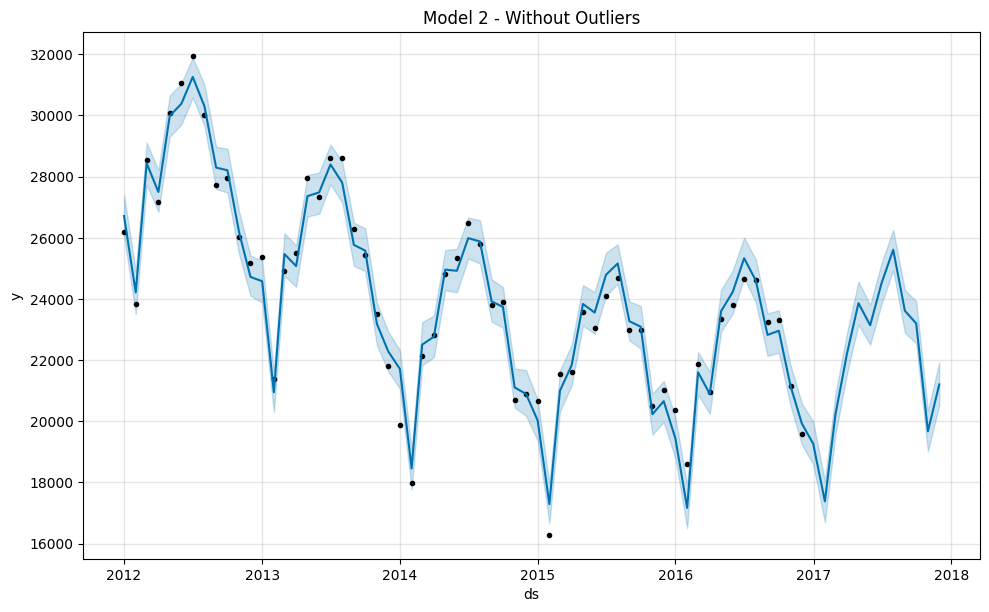

In [39]:
m2.plot(forecast2)
plt.title("Model 2 - Without Outliers")
plt.show()

Model 3 - including holidays

In [ ]:
holidays_0 = pd.DataFrame({
        'holiday': '0 window',
        'ds' :pd.to_datetime(
            ['2003-05-11','2004-05-09','2005-05-08','2006-05-14','2007-05-13','2008-05-11','2009-05-10','2010-05-09','2011-05-08','2012-05-13','2013-05-12','2014-05-11','2015-05-10','2016-05-08','2017-05-14','2018-05-13','2019-05-12','2020-05-10','2003-05-19','2004-05-24','2005-05-23','2006-05-22','2007-05-21','2008-05-19','2009-05-18','2010-05-24','2011-05-23','2012-05-21','2013-05-20','2014-05-19','2015-05-18','2016-05-23','2017-05-22','2018-05-21','2019-05-20','2020-05-18','2003-07-01','2004-07-01','2005-07-01','2006-07-01','2007-07-01','2008-07-01','2009-07-01','2010-07-01','2011-07-01','2012-07-01','2013-07-01','2014-07-01','2015-07-01','2016-07-01','2017-07-01','2018-07-01','2019-07-01','2020-07-01','2003-09-01','2004-09-06','2005-09-05','2006-09-04','2007-09-03','2008-09-01','2009-09-07','2010-09-06','2011-09-05','2012-09-03','2013-09-02','2014-09-01','2015-09-07','2016-09-05','2017-09-04','2018-09-03','2019-09-02','2020-09-07','2003-11-11','2004-11-11','2005-11-11','2006-11-11','2007-11-11','2008-11-11','2009-11-11','2010-11-11','2011-11-11','2012-11-11','2013-11-11','2014-11-11','2015-11-11','2016-11-11','2017-11-11','2018-11-11','2019-11-11','2020-11-11','2003-12-25','2004-12-25','2005-12-25','2006-12-25','2007-12-25','2008-12-25','2009-12-25','2010-12-25','2011-12-25','2012-12-25','2013-12-25','2014-12-25','2015-12-25','2016-12-25','2017-12-25','2018-12-25','2019-12-25','2020-12-25']),
        'lower_window' : 0,
        'upper_window' : 0,
    })

holidays_1 = pd.DataFrame({
        'holiday': '1 window',
        'ds' :pd.to_datetime(
            ['2021-07-04','2021-12-25','2021-12-24','2021-10-11','2020-04-19','2021-05-02','2019-04-28','2010-10-31','2011-10-31','2012-10-31','2013-10-31','2014-10-31','2015-10-31','2016-10-31','2017-10-31','2018-10-31','2019-10-31','2020-10-31','2003-01-01','2004-01-01','2005-01-01','2006-01-01','2007-01-01','2008-01-01','2009-01-01','2010-01-01','2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01']),
        'lower_window' : -1,
        'upper_window' : 1,
    })

holidays_2 = pd.DataFrame({
        'holiday': '2 window',
        'ds' :pd.to_datetime(
            ['2003-08-04','2004-08-02','2005-08-01','2006-08-07','2007-08-06','2008-08-04','2009-08-03','2010-08-02','2011-08-01','2012-08-06','2013-08-05','2014-08-04','2015-08-03','2016-08-01','2017-08-07','2018-08-06','2019-08-05','2020-08-03','2003-10-13','2004-10-11','2005-10-10','2006-10-09','2007-10-08','2008-10-13','2009-10-12','2010-10-11','2011-10-10','2012-10-08','2013-10-14','2014-10-13','2015-10-12','2016-10-10','2017-10-09','2018-10-08','2019-10-14','2020-10-12']),
        'lower_window' : -2,
        'upper_window' : 1,
    })

# Concatenate all 3 df into 1
holidays_list = pd.concat((holidays_0, holidays_1, holidays_2))

In [41]:
m3 = Prophet(holidays=holidays_list)
m3.fit(monthly_crime)
future3 = m3.make_future_dataframe(periods=12, freq='M')
forecast3 = m3.predict(future3)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf9q7kx6_/_r1zfu1e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf9q7kx6_/ycmar7zz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64835', 'data', 'file=/tmp/tmpf9q7kx6_/_r1zfu1e.json', 'init=/tmp/tmpf9q7kx6_/ycmar7zz.json', 'output', 'file=/tmp/tmpf9q7kx6_/prophet_modelzyqw3y12/prophet_model-20250424132816.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:28:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


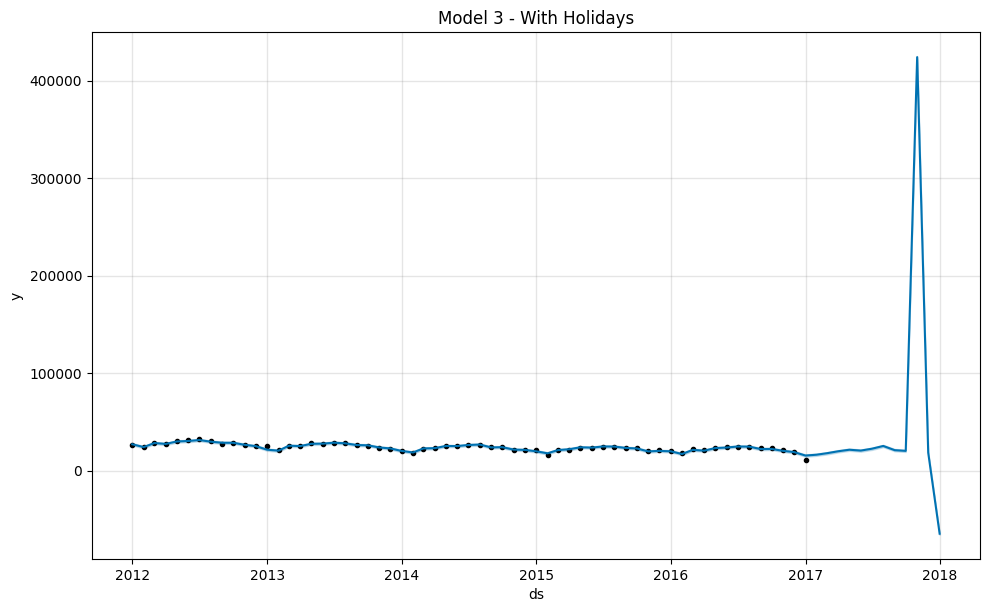

In [42]:
m3.plot(forecast3)
plt.title("Model 3 - With Holidays")
plt.show()

# **Accuracy Metrics**

In [43]:
def evaluate_model(df, forecast):
    merged = pd.merge(df, forecast[['ds', 'yhat']], on='ds')
    rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
    mae = mean_absolute_error(merged['y'], merged['yhat'])
    r2 = r2_score(merged['y'], merged['yhat'])
    accuracy = 100 * (1 - np.mean(np.abs((merged['y'] - merged['yhat']) / merged['y'])))
    return rmse, mae, r2, accuracy

In [44]:
rmse1, mae1, r21, acc1 = evaluate_model(monthly_crime, forecast1)
rmse2, mae2, r22, acc2 = evaluate_model(no_outliers, forecast2)
rmse3, mae3, r23, acc3 = evaluate_model(monthly_crime, forecast3)

In [45]:
print("\nModel Evaluation:\n")
print(f"Model 1 (Plain): RMSE={rmse1:.2f}, MAE={mae1:.2f}, R2={r21:.2f}, Accuracy={acc1:.2f}%")
print(f"Model 2 (No Outliers): RMSE={rmse2:.2f}, MAE={mae2:.2f}, R2={r22:.2f}, Accuracy={acc2:.2f}%")
print(f"Model 3 (With Holidays): RMSE={rmse3:.2f}, MAE={mae3:.2f}, R2={r23:.2f}, Accuracy={acc3:.2f}%")


Model Evaluation:

Model 1 (Plain): RMSE=991.94, MAE=655.74, R2=0.92, Accuracy=96.82%
Model 2 (No Outliers): RMSE=528.82, MAE=418.71, R2=0.97, Accuracy=98.18%
Model 3 (With Holidays): RMSE=935.67, MAE=609.07, R2=0.93, Accuracy=97.04%


The Model without the outliers performs the best.

In [46]:
import pickle

In [47]:
with open("prophet_model_plain.pkl", "wb") as f:
    pickle.dump(m1, f)

In [48]:
with open("prophet_model_no_outliers.pkl", "wb") as f:
    pickle.dump(m2, f)

In [49]:
with open("prophet_model_with_holidays.pkl", "wb") as f:
    pickle.dump(m3, f)

In [50]:
from google.colab import files
files.download('prophet_model_plain.pkl')
files.download('prophet_model_no_outliers.pkl')
files.download('prophet_model_with_holidays.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>